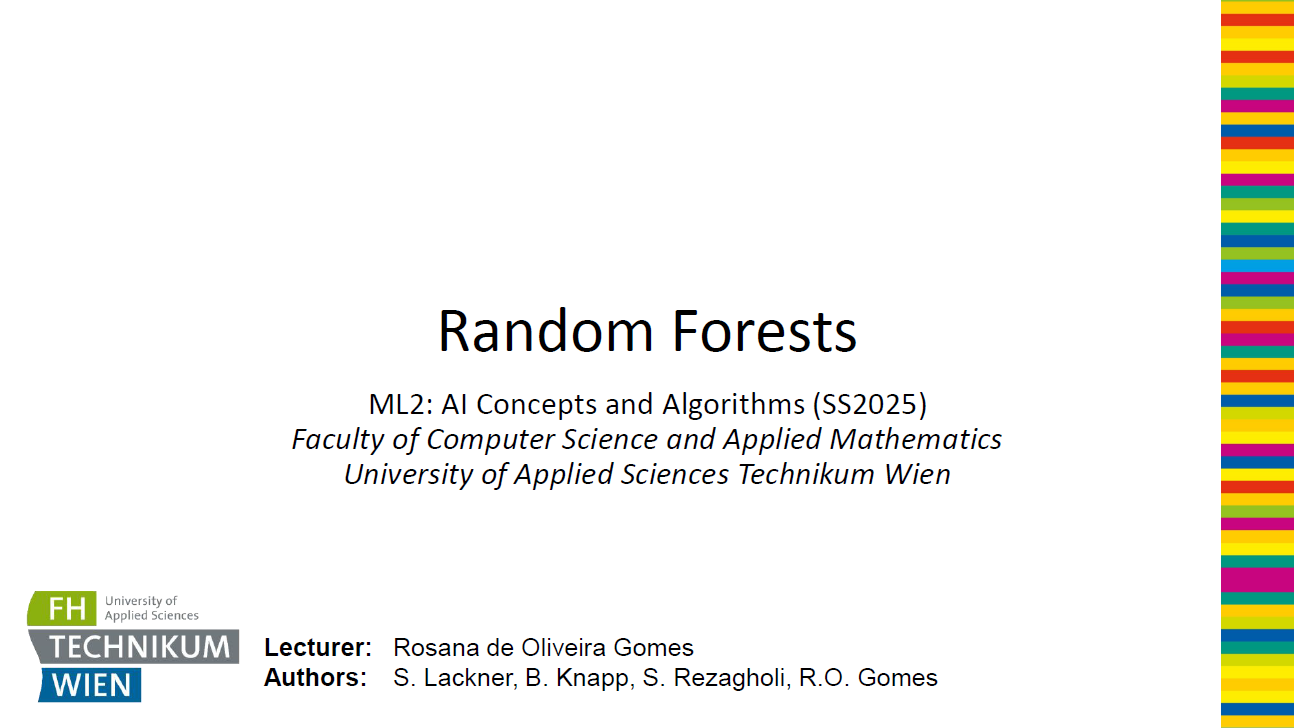


---

**Slide 1: Random Forests**
*Spoken presentation:*

Good \[morning/afternoon], everyone.

Today, I will be presenting on **Random Forests**, as part of the ML2 course: *AI Concepts and Algorithms* for the Summer Semester 2025.

This lecture is part of the **Faculty of Computer Science and Applied Mathematics** at the **University of Applied Sciences Technikum Wien**.

The material was prepared by **S. Lackner, B. Knapp, S. Rezagholi**, and **R.O. Gomes**, and the lecture is led by **Professor Rosana de Oliveira Gomes**.

Let’s now dive into the fascinating world of ensemble learning with Random Forests.

---



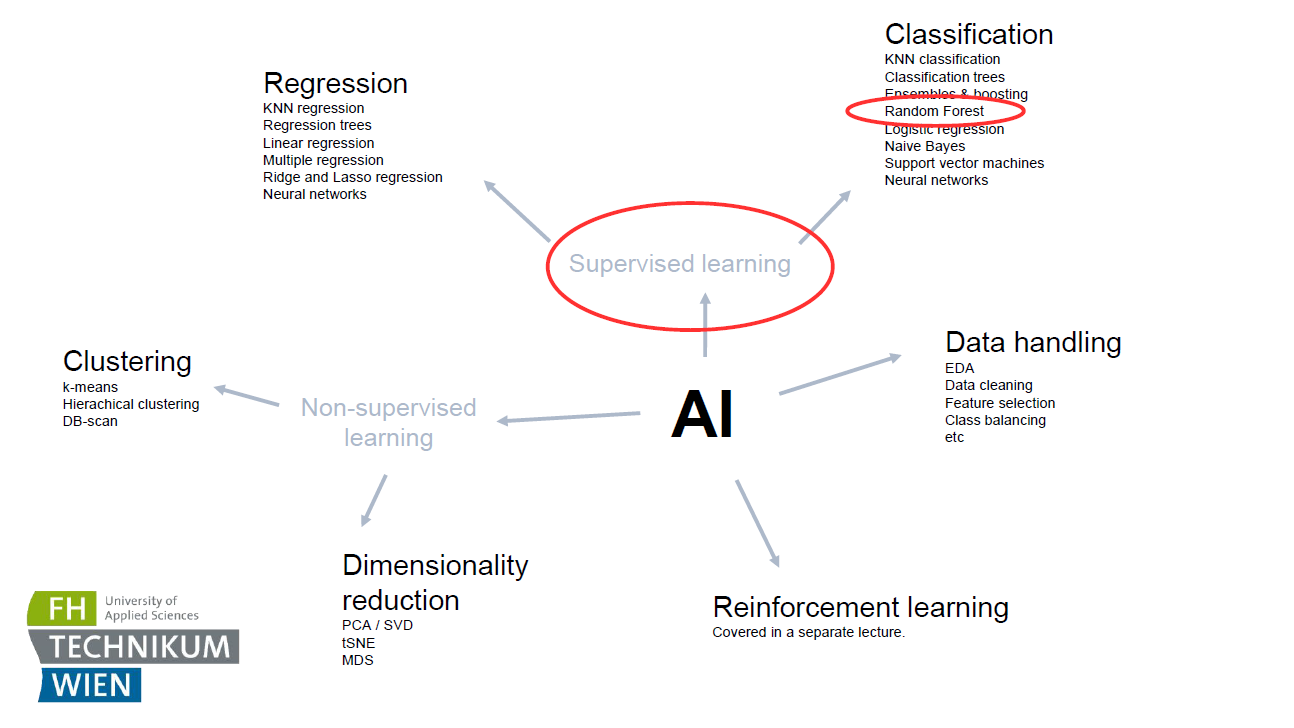


---

**Slide 2: Random Forests in the Landscape of AI**

*Spoken presentation:*

Before we get into the technical details, let’s take a quick look at where **Random Forests** fit into the broader picture of Artificial Intelligence.

In AI, we have various branches, and one major branch is **Supervised Learning**, highlighted here in the center. This is where Random Forests belong.

Within Supervised Learning, we find two main tasks: **Regression** and **Classification**. Random Forests are especially known for their performance in classification tasks, as highlighted on the top right of the slide. But they can also be applied effectively to regression problems.

Other categories of machine learning shown here include **Unsupervised Learning** — such as clustering and dimensionality reduction — and **Reinforcement Learning**, which is covered in a separate lecture.

To build effective AI models, we also need to focus on **Data Handling** — including exploration, cleaning, feature selection, and class balancing — all of which play a critical role in preparing the data before feeding it into models like Random Forests.

So, in this lecture, we’ll zoom into Random Forests, a powerful ensemble method used primarily for supervised classification and regression tasks.

---



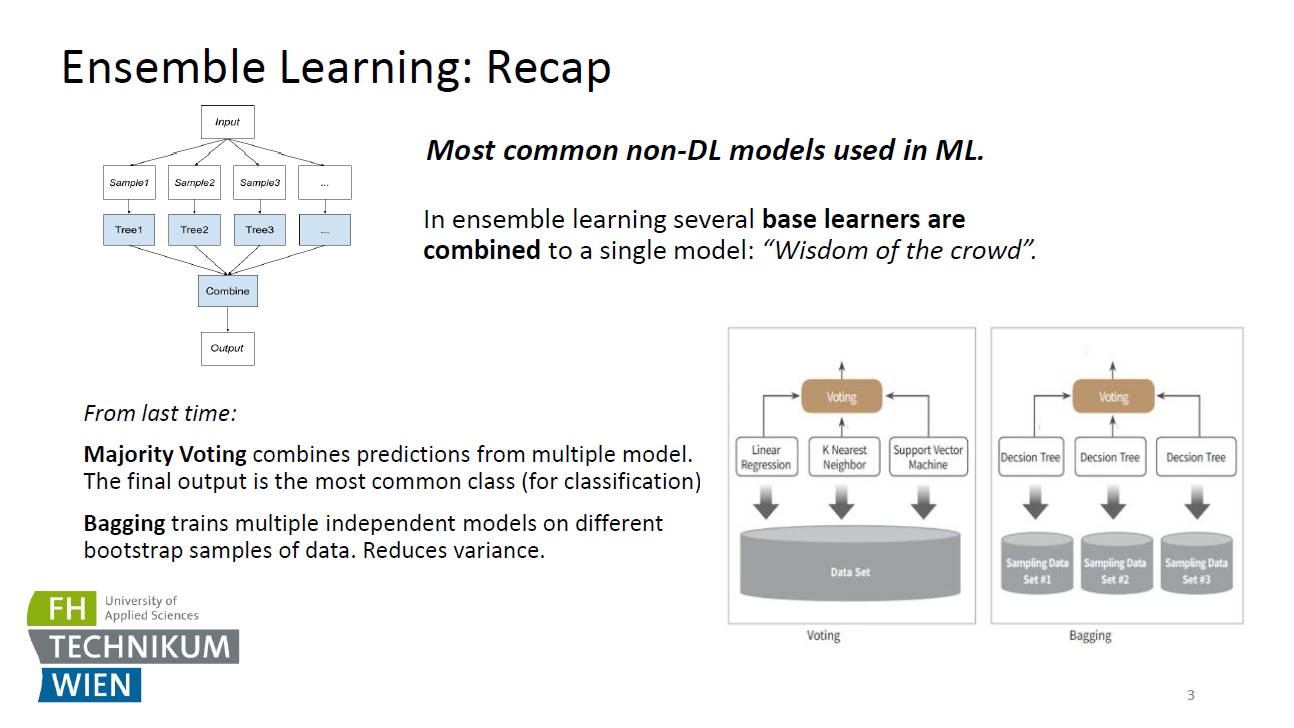


---

**Slide 3: Ensemble Learning – Recap**

*Spoken presentation:*

Before we dive deeper into Random Forests, let’s quickly recap the concept of **ensemble learning**, which Random Forests are part of.

Ensemble learning refers to the technique where we combine the predictions of several **base learners** into a **single, more robust model**. This approach is often described as the *"Wisdom of the crowd"* — the idea that a group of weak or diverse models, when combined correctly, can outperform a single strong model.

On the left side of the slide, we see a diagram illustrating how different data samples are used to train multiple models — in this case, decision trees — and their outputs are then combined to make the final prediction.

We also see two important ensemble techniques:

* **Majority Voting**: This method aggregates predictions from different models and selects the class that occurs most frequently. It is mainly used for classification tasks.

* **Bagging** (short for Bootstrap Aggregating): This technique trains several models independently on different **bootstrap samples** of the dataset. The idea is to reduce variance by averaging the predictions of these models. Bagging is particularly effective when using high-variance models like decision trees.

As we’ll see next, Random Forests build on both of these ideas — using **bagging** with decision trees and applying **majority voting** for classification.

---



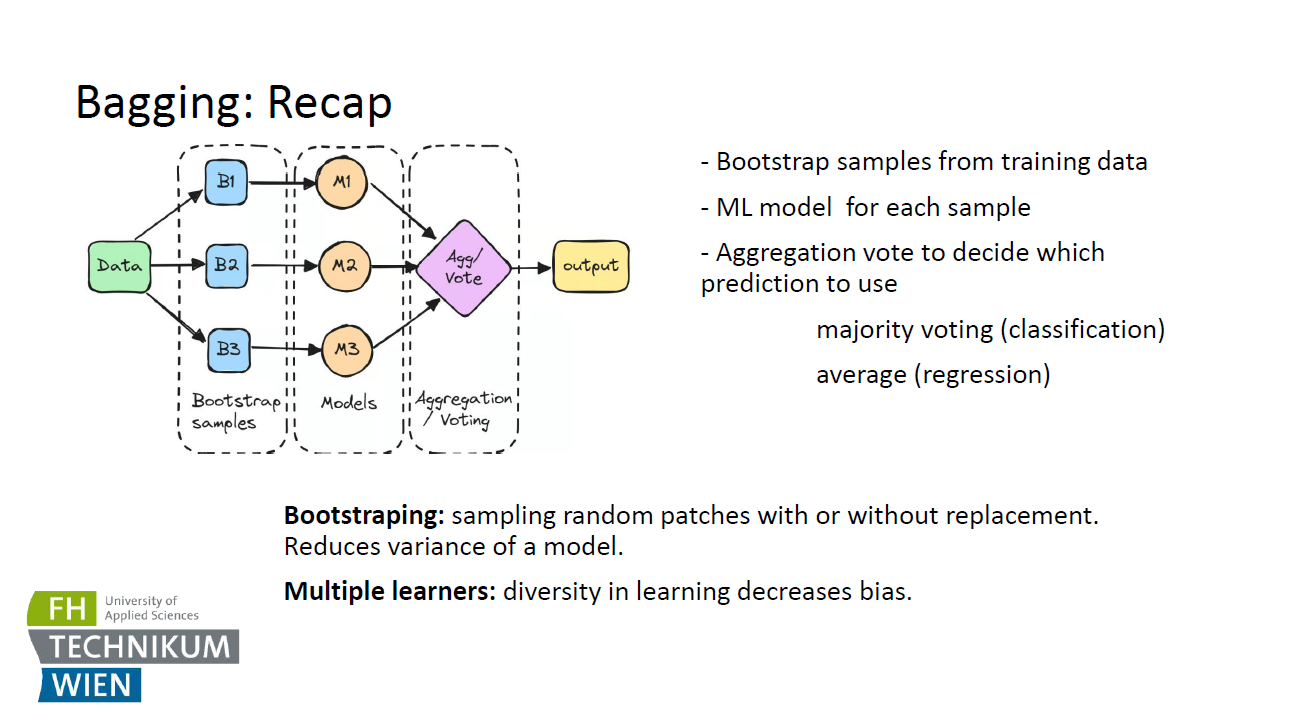


---

**Slide 4: Bagging – Recap**

*Spoken presentation:*

Now let’s revisit the concept of **Bagging**, which is a fundamental building block of the Random Forest algorithm.

As shown in the diagram on the left, we begin with a training dataset and generate **bootstrap samples** — that is, random samples taken with or without replacement. These are labeled B1, B2, and B3 in the illustration.

For each of these bootstrap samples, we train a separate machine learning model — M1, M2, M3, and so on.

Once each model has made its prediction, we apply an **aggregation step**, which can either be:

* **Majority voting** for classification tasks, or
* **Averaging** for regression tasks.

The final output comes from this aggregation of all individual model predictions.

At the bottom of the slide, we’re reminded why this technique is useful:

* **Bootstrapping** helps reduce the variance of the model by ensuring that each model sees a slightly different view of the data.
* Using **multiple learners** promotes diversity, which in turn helps to reduce bias and improve generalization.

This is precisely the principle behind Random Forests: bagging combined with decision trees.

---



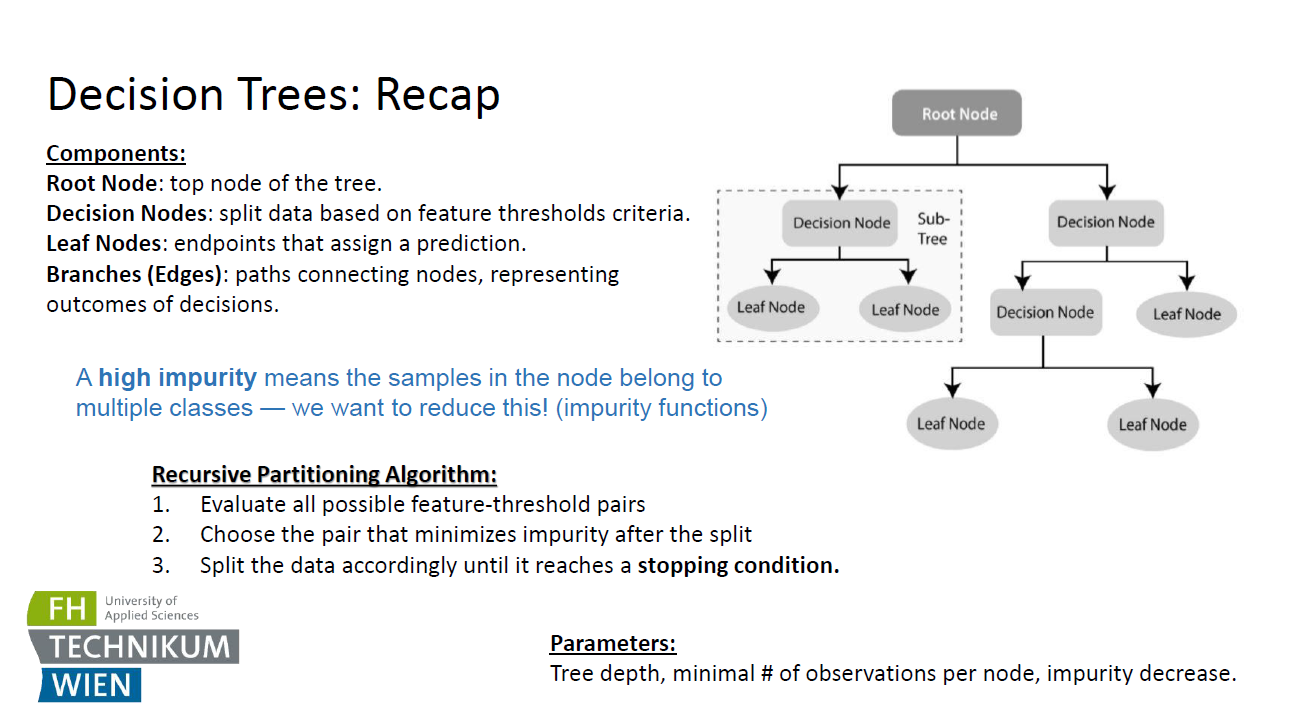


---

**Slide 5: Decision Trees – Recap**

*Spoken presentation:*

To understand Random Forests, we must understand their fundamental building block — the **Decision Tree**.

Let’s briefly go over its **components**:

* The **Root Node** is at the top of the tree and represents the starting point.
* **Decision Nodes** are internal points that split the data based on certain feature thresholds.
* **Leaf Nodes** are the terminal nodes — they assign the final prediction.
* The **Branches** or edges represent the possible outcomes of a decision and connect the nodes in the tree.

A key concept here is **impurity**.
A **high impurity** means the samples in a node are mixed — they belong to different classes. Our goal is to **reduce impurity** as much as possible using split criteria, so that each node becomes more "pure" — ideally containing samples from only one class.

We achieve this with the **Recursive Partitioning Algorithm**, which follows these steps:

1. Evaluate all possible combinations of features and thresholds.
2. Choose the one that minimizes impurity the most.
3. Split the data accordingly and repeat this process until a **stopping condition** is met.

Typical **parameters** that influence this process include:

* The **maximum depth** of the tree,
* The **minimum number of observations** required in a node to consider splitting it, and
* The **minimum impurity decrease** needed to justify a split.

This recap sets the stage for understanding how **Random Forests** extend this idea by combining many such trees into a single, powerful model.

---



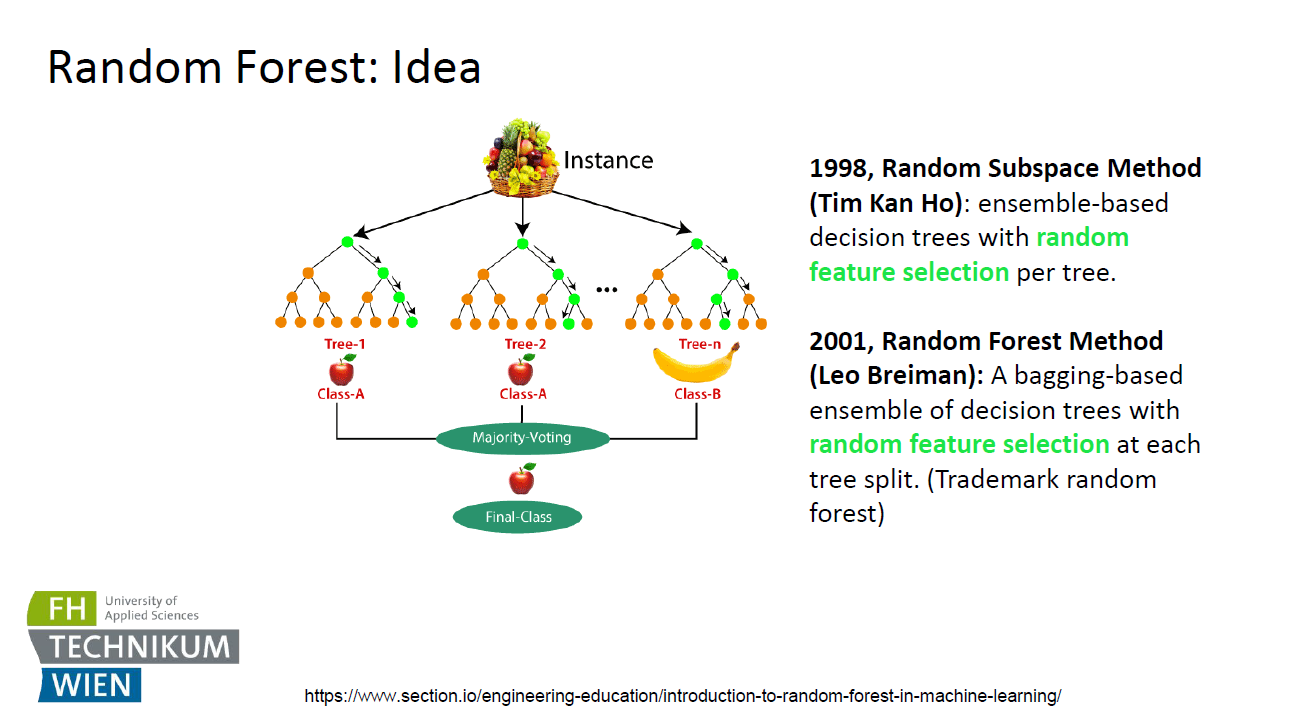


---

**Slide 6: Random Forest – Idea**

*Spoken presentation:*

Let’s now look at the core idea behind **Random Forests**.

A Random Forest is an **ensemble** of decision trees, where each tree is trained on a different **bootstrap sample** of the data, and at each split in the tree, a **random subset of features** is considered instead of all features.

This idea builds on two key innovations:

* In **1998**, **Tim Kan Ho** proposed the **Random Subspace Method**, where different trees are built using different random subsets of features. This helped introduce diversity among the trees.

* Then, in **2001**, **Leo Breiman** formalized the **Random Forest Method**. He combined **bagging** with **random feature selection at each tree split**, which is the hallmark of Random Forests today.

Let’s look at the visual:

We have a fruit instance that is passed through multiple trees — **Tree-1**, **Tree-2**, up to **Tree-n** — each giving its own prediction.
Some trees vote for Class A (an apple), while another votes for Class B (a banana).
The final class is decided through **majority voting**, which in this case results in **Class A** as the output.

This combination of model **variance reduction** through bagging and **bias reduction** through feature randomness makes Random Forests powerful and robust.

---



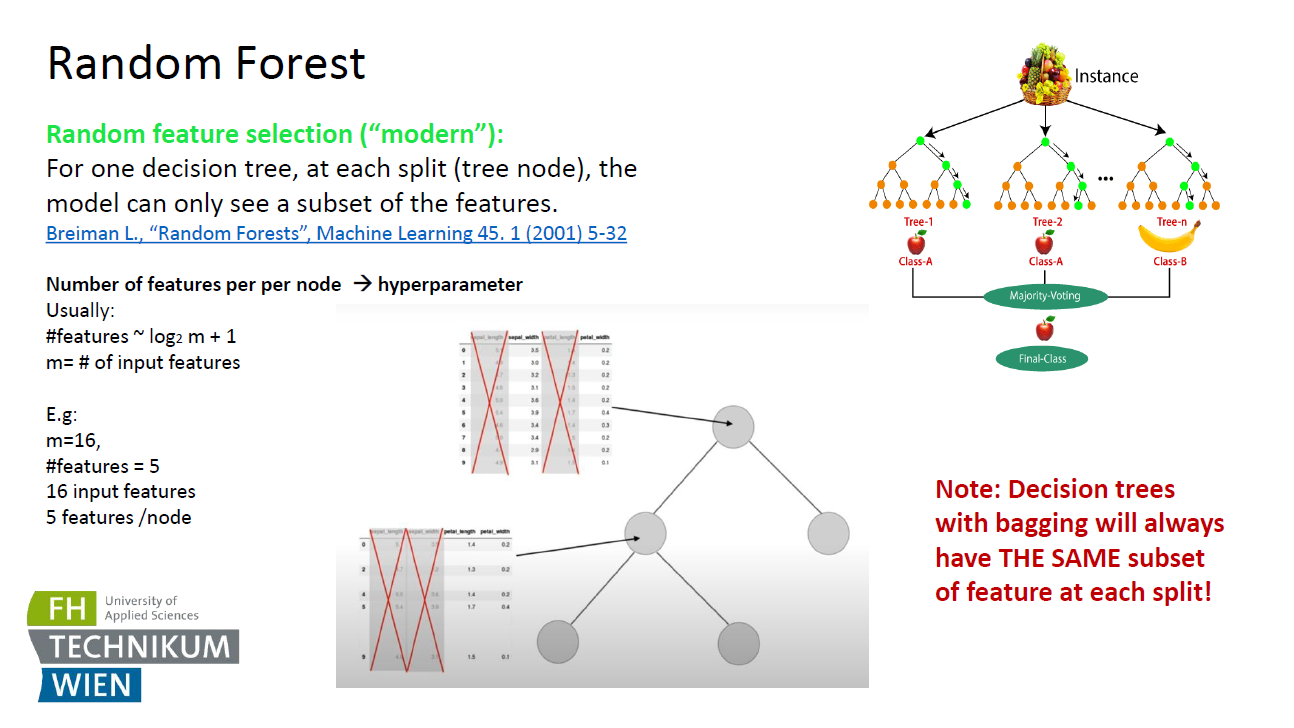


---

**Slide 7: Random Forest – Feature Selection**

*Spoken presentation:*

Now let’s go deeper into the **random feature selection** mechanism that gives Random Forests their strength and diversity.

In a **modern Random Forest**, each **decision tree** is trained not only on a different bootstrap sample of the data — but at **each individual split**, the model is only allowed to see a **random subset of the features**.

This strategy is based on **Leo Breiman’s** 2001 paper, which formalized this technique.

We treat the **number of features per node** as a **hyperparameter**. The common default for classification problems is:

$$
\text{\#features} \approx \log_{2}(m) + 1
$$

Where `m` is the total number of input features.

So, for example:

* If we have 16 features in total,
* Then each tree node will randomly select 5 of those features to consider at that split.

This is visualized in the figure:
Only a few features are passed down and used at each node, helping to create **uncorrelated trees**. This randomness reduces overfitting and increases model generalization.

On the right-hand side, you can see a reminder:

> **Note**: Decision trees built via standard bagging always use the **same full feature set** at each split. But in Random Forests, we apply **random feature selection** at every split, making them even more powerful.

---



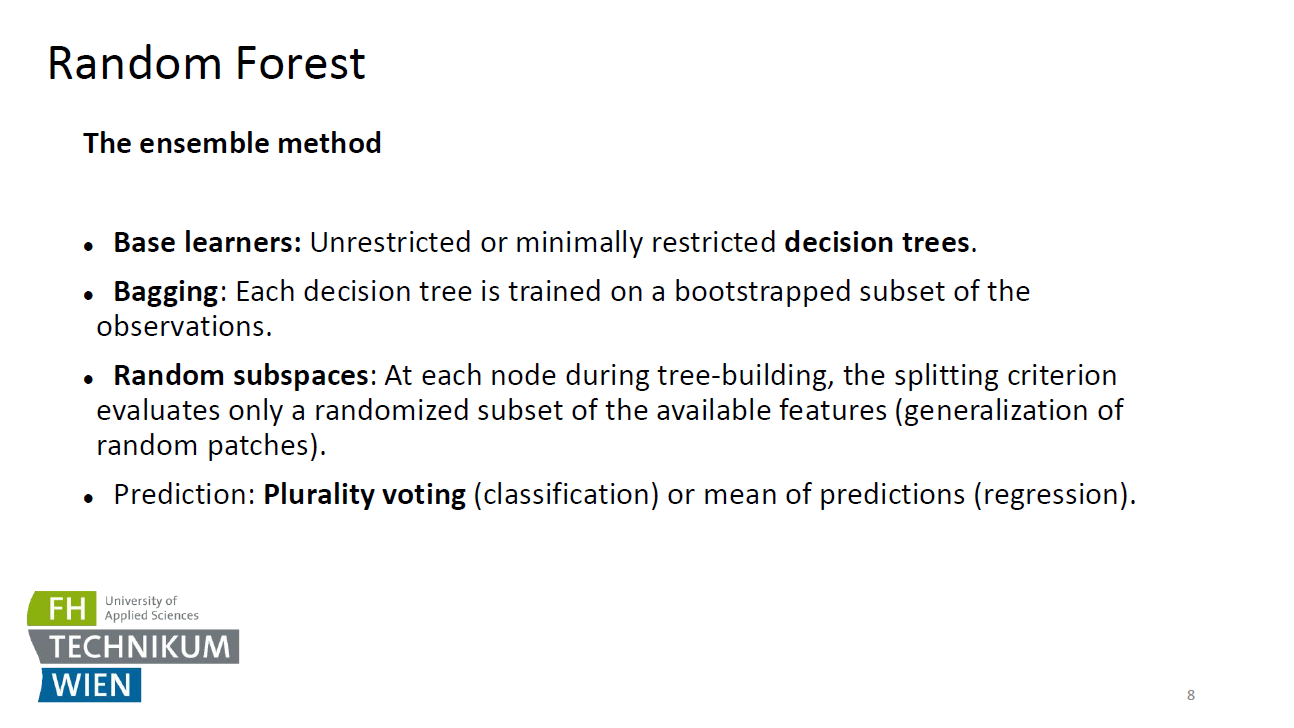


---

**Slide 8: Random Forest – The Ensemble Method**

*Spoken presentation:*

Let’s now summarize the key components of the **Random Forest** algorithm as an **ensemble method**.

* **Base learners**: The individual models in a Random Forest are **decision trees**, typically with few restrictions. These trees can grow deep, and they may overfit on their own — but when aggregated, they generalize better.

* **Bagging**: As discussed before, each decision tree is trained on a **bootstrapped subset** of the training data. This adds randomness and helps reduce variance.

* **Random subspaces**: At each split in each tree, only a **random subset of the available features** is considered. This technique further decorrelates the trees, helping the ensemble be more robust. You can think of it as a generalization of using “random patches” of the feature space.

* **Prediction**: Finally, when making a prediction, Random Forests apply:

  * **Plurality voting** for classification — the most voted class wins.
  * Or the **mean of the predictions** in the case of regression tasks.

This combination of **diversity (via bagging and feature subsampling)** and **aggregation (via voting or averaging)** makes Random Forests one of the most widely used and effective machine learning models.

---



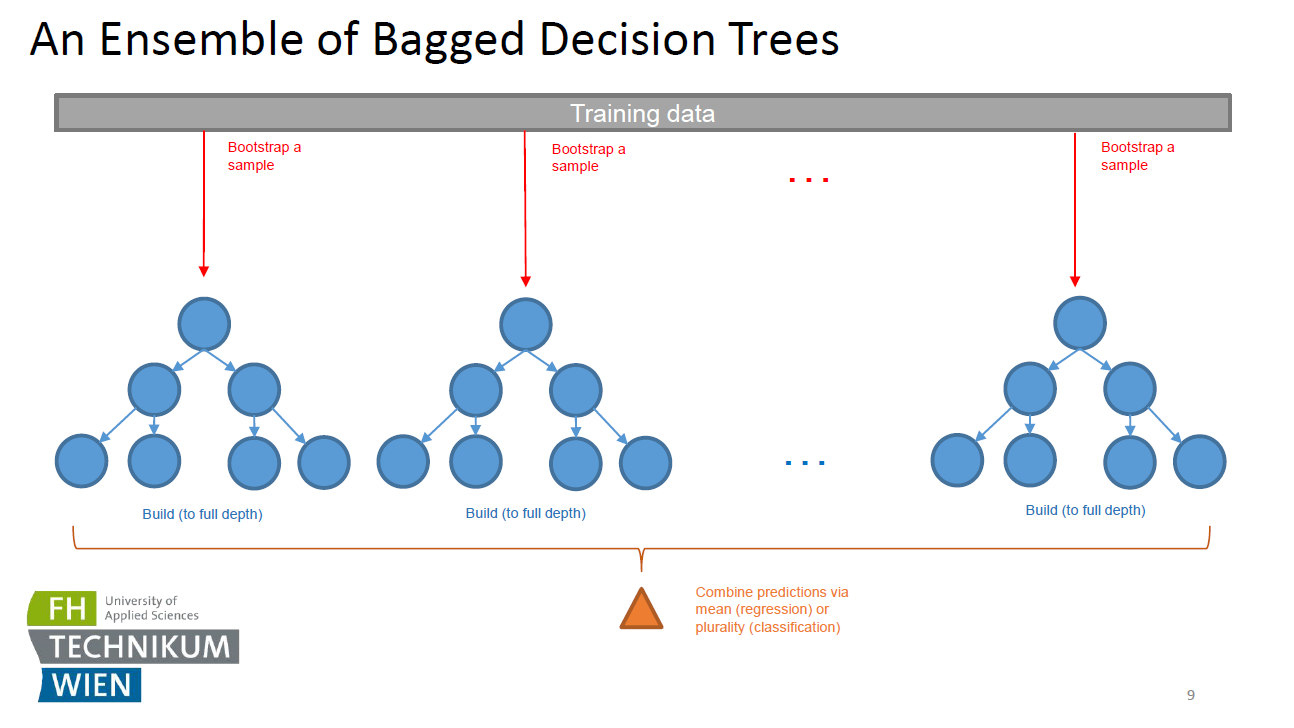


---

**Slide 9: An Ensemble of Bagged Decision Trees**

*Spoken presentation:*

This slide shows the overall structure of a **Random Forest** using a visual summary of the bagging process.

We start at the top with the **training dataset**.

From this dataset, we generate multiple **bootstrap samples** — this means randomly sampling with replacement — to create different versions of the dataset for training.

Each of these samples is then used to build a separate **decision tree**.
These trees are usually allowed to grow **to full depth**, without pruning, so that they can fully learn from their subset of the data.

This process continues for as many trees as we choose — often in the hundreds — building a **forest** of decision trees.

Once all trees are trained, we **combine their predictions**:

* For **regression**, we take the **mean** of all predicted values.
* For **classification**, we use **plurality voting** — the class that gets the most votes becomes the final output.

So again, we are combining multiple weak learners into a strong model, leveraging the power of randomness and aggregation.

---



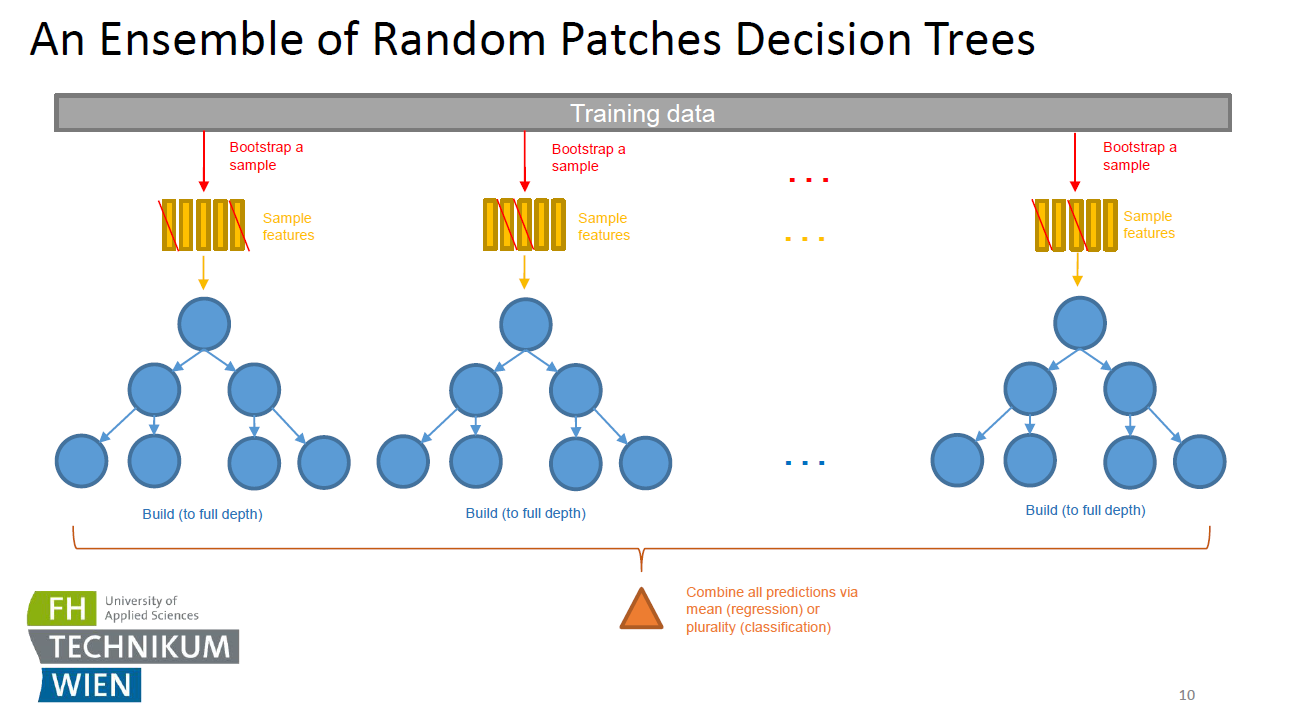


---

**Slide 10: An Ensemble of Random Patches Decision Trees**

*Spoken presentation:*

This slide shows an evolution of the previous concept — now incorporating both **row and column sampling**.

We begin, once again, with the full **training dataset**.

Each decision tree is trained using:

* A **bootstrap sample** of the **rows** (data instances), and
* A **random sample of features** — also known as **random patches**.

In the visualization, each red arrow selects a different subset of the training data.
But now, before training the tree, we also apply **feature sampling** — shown here with some features crossed out. Each tree is trained using only a **subset of the total features**.

This means that:

* Each tree gets a different **view of the data**,
* Both in terms of **which data points it sees**, and **which features it uses**.

As with standard Random Forests:

* Trees are grown **to full depth**, using their own randomly sampled data and features.
* Then, the predictions are **aggregated**:

  * Using **plurality voting** for classification.
  * Or the **mean prediction** for regression.

This technique increases **diversity** among trees and makes the ensemble much more robust to overfitting — especially in high-dimensional datasets.

---



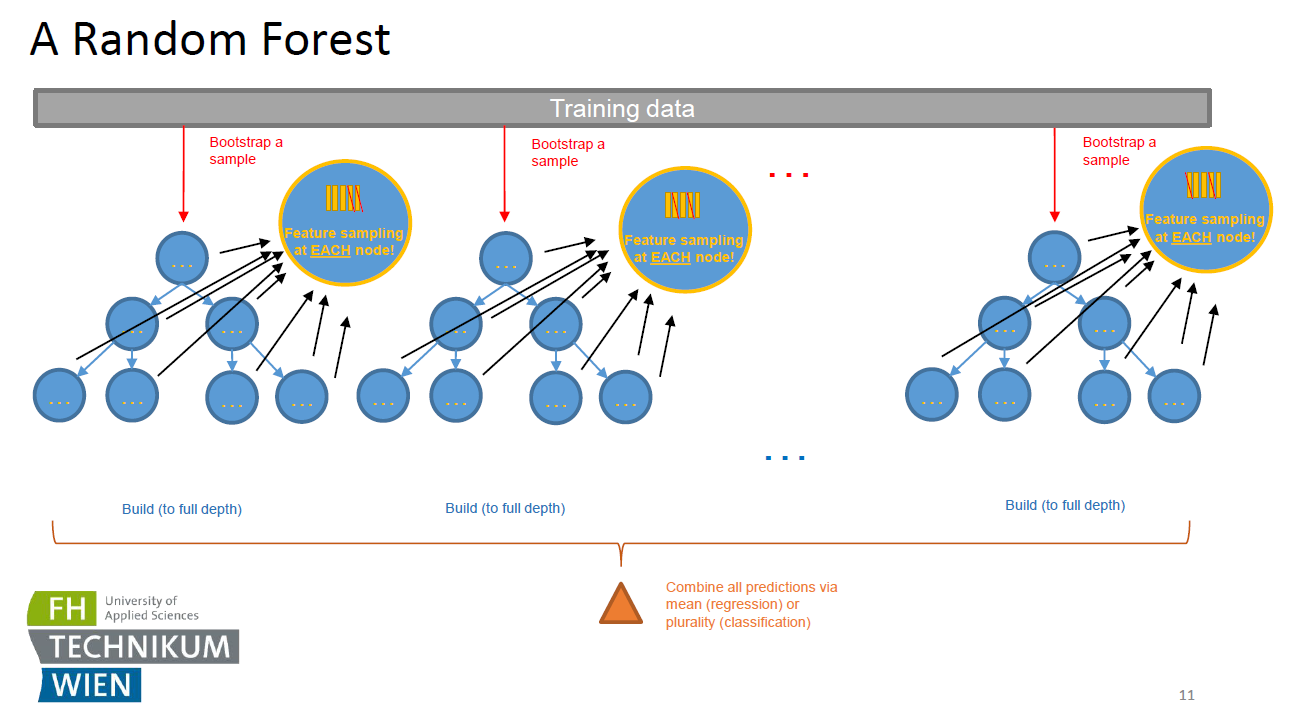


---

**Slide 11: A Random Forest**

*Spoken presentation:*

This slide illustrates the **final architecture** of a proper **Random Forest** model — and what truly makes it "random."

As before, we start with the full **training dataset**, and from that, we generate **bootstrap samples** — one for each tree.

But now, notice the key difference emphasized in the orange circles:
Each **individual node** within every tree performs **feature sampling** independently.

So this is **feature sampling at each split**, not just once per tree.

This means:

* At every decision point in every tree, only a **random subset of features** is considered.
* Different nodes in the same tree may be using **completely different subsets** of features.
* This creates high **decorrelation** between the trees, which is essential to reduce **variance** and improve **generalization**.

All the trees are allowed to grow **to full depth**, learning as much as they can from their unique view of the data.

At the end, we aggregate their predictions via:

* **Plurality voting** for classification, or
* **Mean** for regression.

So, to summarize:
A **Random Forest = Bagging + Feature Sampling at Each Node**, leading to an ensemble that is powerful, stable, and resistant to overfitting.

---



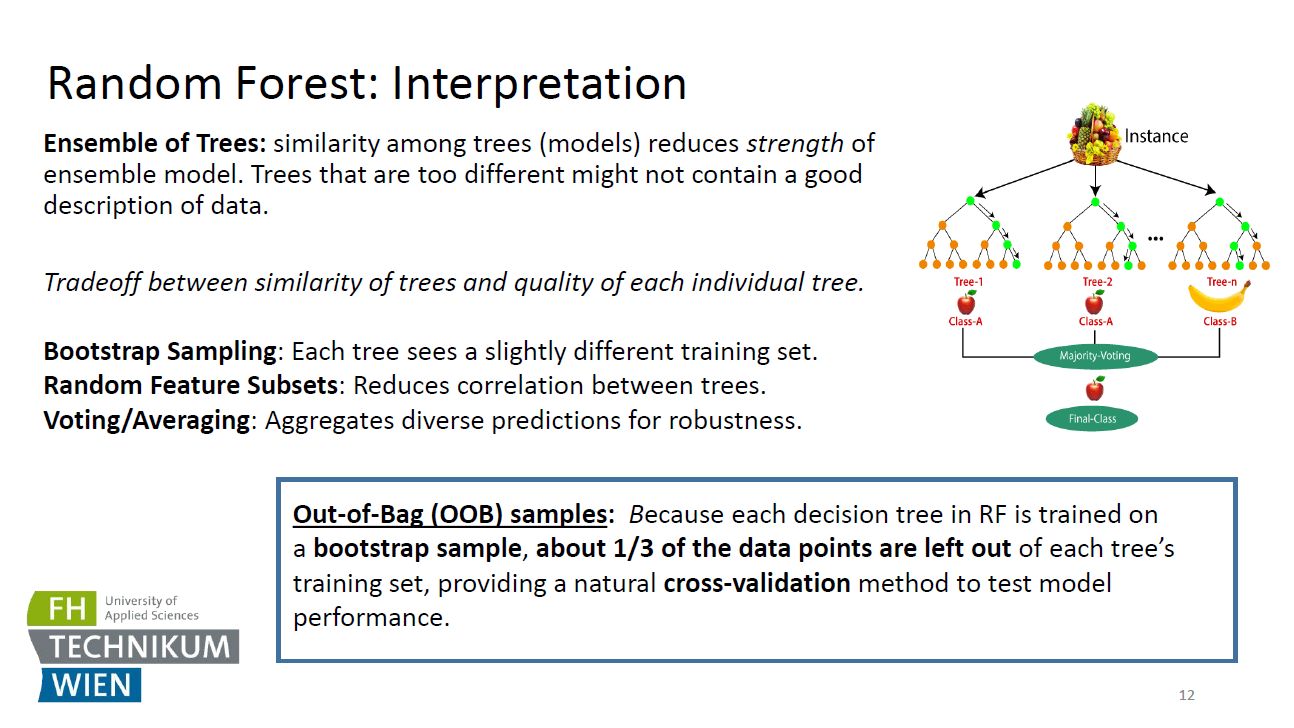


---

**Slide 12: Random Forest – Interpretation**

*Spoken presentation:*

Let’s now interpret what a Random Forest is doing from a conceptual point of view.

At its core, a **Random Forest** is an **ensemble of decision trees**.

* If the trees are **too similar**, the ensemble won’t gain much from the voting process — it's like asking the same person multiple times.
* But if the trees are **too different**, they may not capture meaningful patterns in the data.

So, there’s a **tradeoff** between the **diversity of the trees** and the **quality of each individual tree**.

This tradeoff is carefully managed using:

* **Bootstrap Sampling**: Each tree sees a slightly different training dataset.
* **Random Feature Subsets**: Each split only considers a few features, which helps reduce correlation between trees.
* **Voting or Averaging**: Aggregates all predictions to create a more robust and stable final result.

Now here’s a very practical and powerful concept in Random Forests:

### **Out-of-Bag (OOB) Samples**

Because each tree is trained on a **bootstrap sample**, roughly **one-third of the original data** is **left out** of the training for that particular tree. These are called **Out-of-Bag samples**.

These OOB samples can be used as a **built-in validation set**, allowing us to estimate the model’s performance **without the need for a separate test set or explicit cross-validation**.

This makes Random Forests **efficient and self-evaluating**, which is one of the reasons why they are so widely used in practice.

---



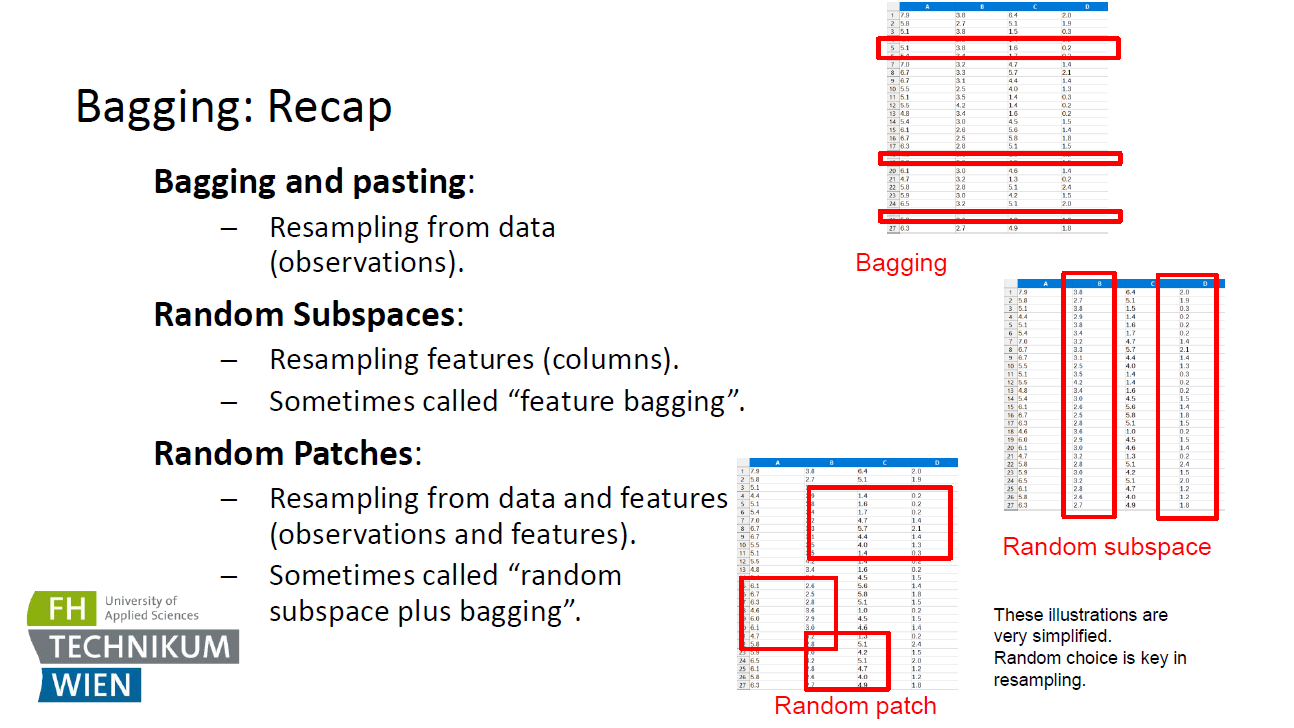


---

**Slide 13: Bagging – Recap**

*Spoken presentation:*

To wrap up, let’s recap the different sampling strategies we’ve talked about — all of which contribute to the power of ensemble methods like Random Forests.

### 1. **Bagging and Pasting**:

* This involves **resampling rows**, or data observations.
* In bagging, the sampling is done **with replacement**; in pasting, it’s **without replacement**.
* As shown in the upper-right diagram, certain rows are repeated — this is typical in bootstrapping.

### 2. **Random Subspaces**:

* Here we **resample columns** — that is, features — instead of rows.
* This technique is also known as **feature bagging**.
* In the diagram, only a subset of columns is selected for training.

### 3. **Random Patches**:

* This is a **combination** of both row and column sampling.
* We randomly select both a subset of the data points **and** a subset of features.
* This technique is powerful because it maximizes diversity across the ensemble — which improves generalization.

These illustrations are simplified, but they help convey the core idea:
By combining **randomness in both data and features**, we create **diverse models** that, when aggregated, form a **robust and accurate prediction system**.

This is the essence of Random Forests.

---



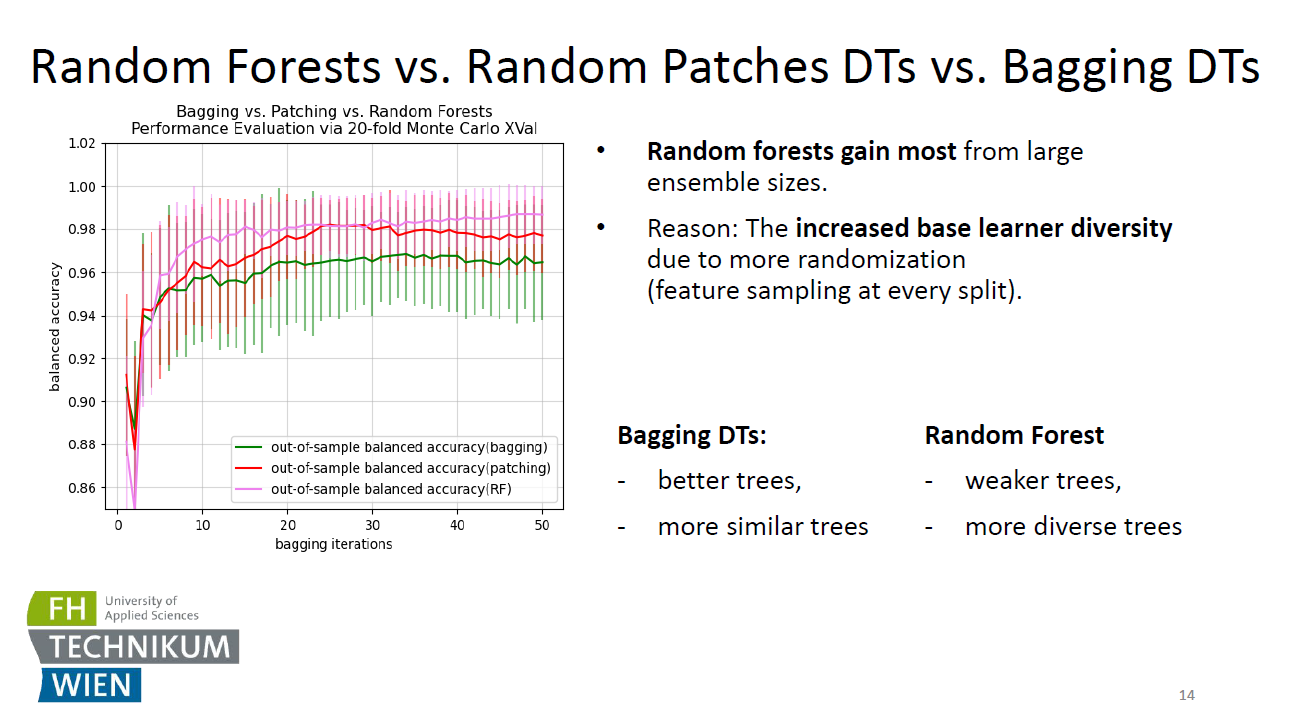


---

**Slide 14: Random Forests vs. Random Patches DTs vs. Bagging DTs**

*Spoken presentation:*

To conclude, let’s compare the performance of **Bagging**, **Random Patching**, and **Random Forests** based on out-of-sample balanced accuracy.

In the plot on the left, you see the average performance over multiple runs:

* The **green line** represents pure **bagging** with full feature sets.
* The **red line** shows **random patching**, which samples both data and features.
* The **magenta line** represents the **Random Forest**, which uses random feature selection at each split.

You can clearly see that **Random Forests outperform** the other methods as the number of trees in the ensemble increases.

Why?
Because **Random Forests gain the most from ensemble size** thanks to their **greater diversity**.
That is, by applying **random feature sampling at each node**, the trees are **less correlated** with each other — making the ensemble more robust and generalizable.

Here’s a useful summary:

|           | **Bagging DTs**       | **Random Forests**             |
| --------- | --------------------- | ------------------------------ |
| Trees     | Better, more accurate | Weaker individually            |
| Diversity | More similar          | More diverse (less correlated) |

So while bagging may produce **stronger individual trees**, Random Forests win through **ensemble diversity**, which reduces overfitting and improves generalization — especially with larger model sizes.

---



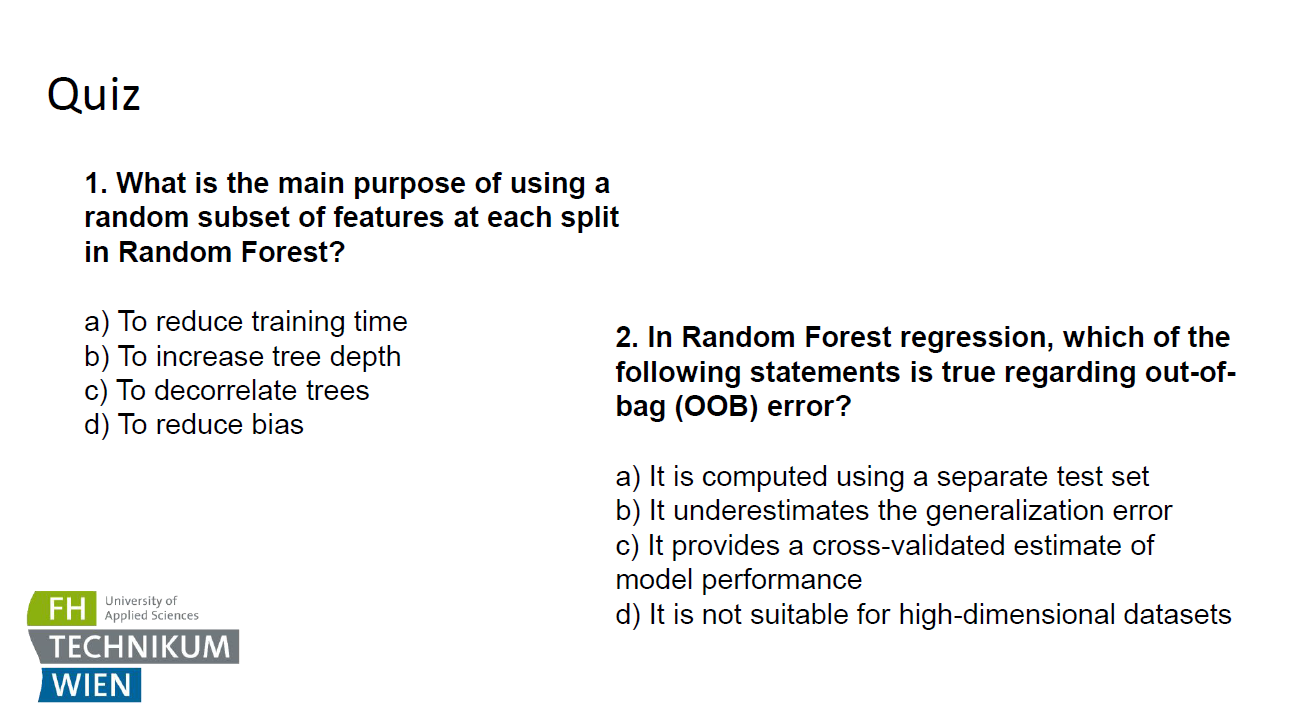


---

**Slide 15: Quiz**

*Spoken presentation:*

Let’s close this presentation with a quick quiz to test your understanding of Random Forests.

---

**Question 1:**
**What is the main purpose of using a random subset of features at each split in Random Forest?**
a) To reduce training time
b) To increase tree depth
✅ **c) To decorrelate trees**
d) To reduce bias

➡️ The correct answer is **(c)**.
Using random feature subsets at each node helps make each tree different from the others. This **reduces correlation** between the trees, improving the performance of the ensemble by reducing overfitting.

---

**Question 2:**
**In Random Forest regression, which of the following statements is true regarding out-of-bag (OOB) error?**
a) It is computed using a separate test set
b) It underestimates the generalization error
✅ **c) It provides a cross-validated estimate of model performance**
d) It is not suitable for high-dimensional datasets

➡️ The correct answer is **(c)**.
Because each tree is trained on a bootstrap sample, about one-third of the data is **left out** of each tree’s training set. These **out-of-bag samples** can be used to validate the tree, effectively providing a **built-in cross-validation** mechanism — without needing a separate test set.

---



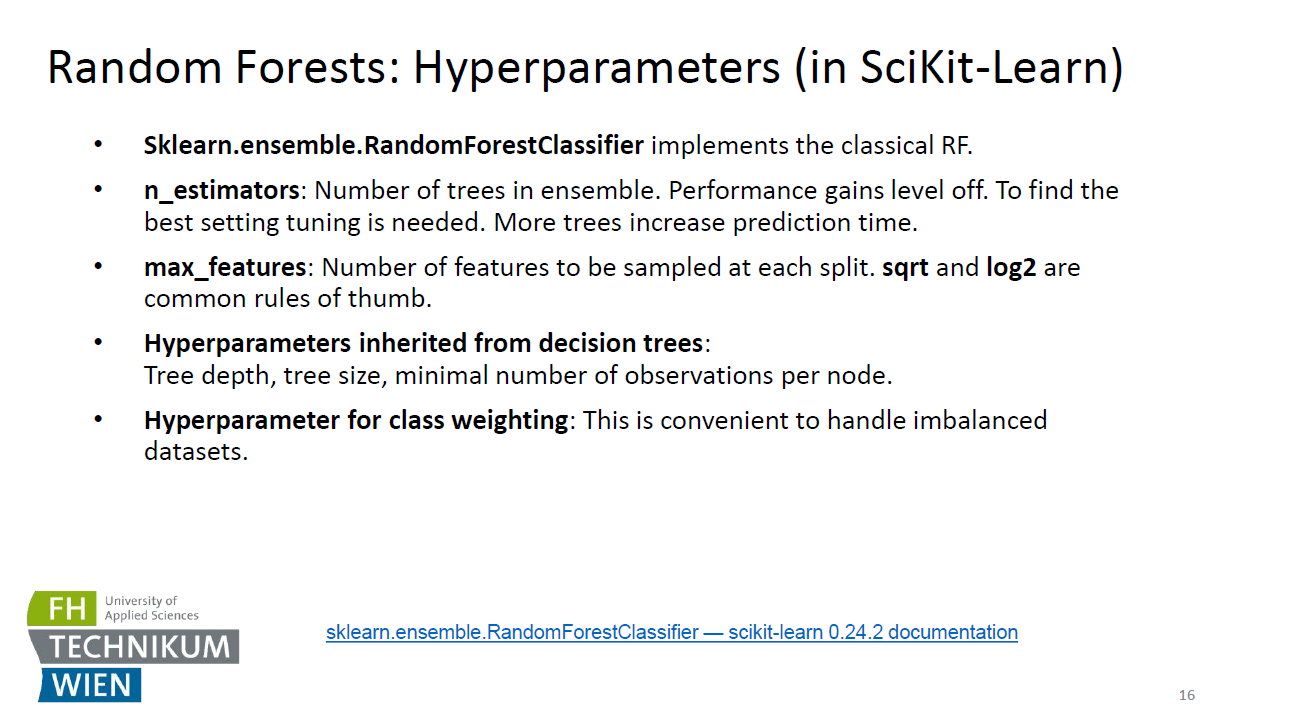


---

**Slide 16: Random Forests – Hyperparameters (in SciKit-Learn)**

*Spoken presentation:*

To close, let’s look at how Random Forests are implemented in **SciKit-Learn**, and the most important **hyperparameters** we need to tune when using the `RandomForestClassifier`.

* **`sklearn.ensemble.RandomForestClassifier`** is the standard implementation of Random Forests in SciKit-Learn. It includes all the mechanisms we’ve discussed: bagging, random feature selection, and ensemble prediction.

* **`n_estimators`**: This defines the **number of trees** in the forest.
  Adding more trees generally improves performance — up to a point.
  Eventually, **performance gains level off**, but **prediction time continues to increase**, so tuning is necessary.

* **`max_features`**: This controls how many features are considered at each split.
  Common values are:

  * `"sqrt"` for classification tasks, and
  * `"log2"` as an alternative.

* There are also **hyperparameters inherited from the underlying decision trees**, such as:

  * **Tree depth**,
  * **Minimum samples per split or per leaf**, and
  * **Maximum number of leaf nodes**.

* Lastly, there's a **`class_weight`** hyperparameter, which is useful for handling **imbalanced datasets**.
  It allows you to give more importance to minority classes during training.

You can explore all these settings and more in the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

---



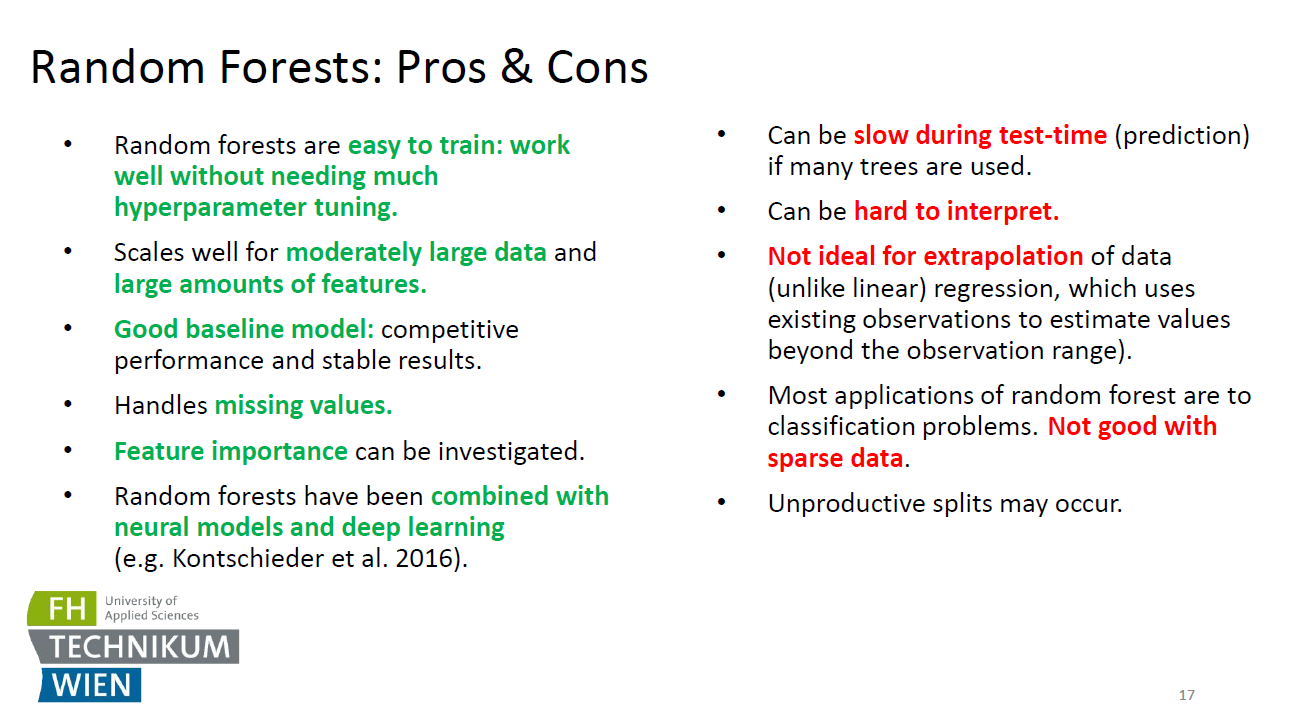


---

**Slide 17: Random Forests – Pros & Cons**

*Spoken presentation:*

Let’s finish the presentation by reviewing the **main advantages and disadvantages** of Random Forests.

---

### ✅ **Pros**:

* **Easy to train**: Random Forests often perform well **without much hyperparameter tuning**.
* They **scale well** to moderately large datasets and work efficiently with many features.
* They’re considered a **good baseline model**, offering strong and stable performance.
* They can handle **missing values** natively — no need for complex imputation.
* They allow us to **analyze feature importance**, which can be helpful for model interpretation and debugging.
* And interestingly, they’ve even been successfully **combined with neural networks** and **deep learning architectures**, as shown in some hybrid models like those by Kontschieder et al.

---

### ❌ **Cons**:

* **Prediction can be slow** if the forest contains many trees — test-time performance can be a bottleneck.
* While we can get feature importances, the model itself can be **hard to interpret**, especially with hundreds of trees.
* **Not ideal for extrapolation**: Unlike linear regression, Random Forests are poor at predicting values **outside the range** of the training data.
* They're **not well suited for sparse data**, such as text features represented as one-hot encodings or very high-dimensional binary vectors.
* And finally, **unproductive splits** — those that don’t improve model performance — may still be explored during training, which adds computational overhead.

---

So while Random Forests are robust and versatile, it’s important to understand their limitations and apply them where they shine best — particularly for **classification tasks with structured data**.


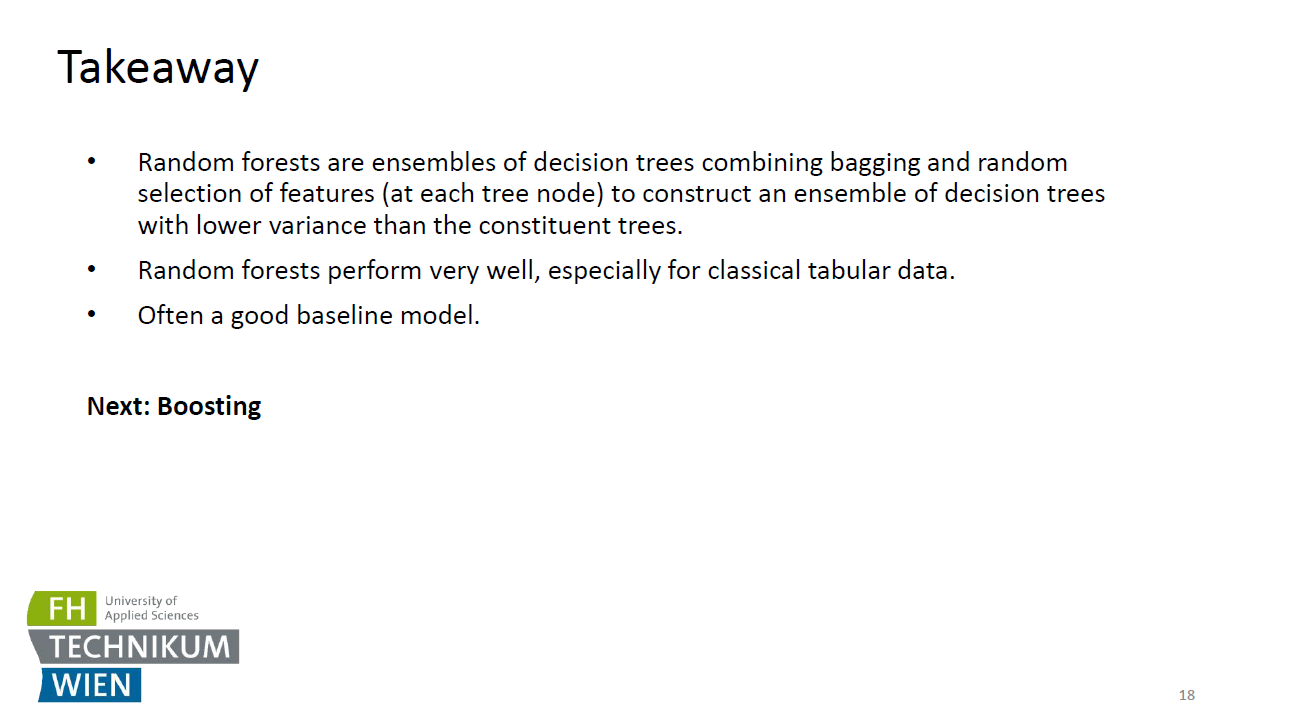


---

**Slide 18: Takeaway**

*Spoken presentation:*

Let’s summarize the key takeaways from today’s presentation on **Random Forests**.

* Random Forests are **ensembles of decision trees**.
  They combine two powerful ideas:

  * **Bagging**, or bootstrap aggregation, and
  * **Random feature selection at each tree node**.
    This combination helps to build a model that has **lower variance** than the individual trees, improving generalization.

* They perform particularly well on **structured, tabular data**, which is common in real-world applications.

* And they are often considered a **good baseline model** — quick to train, robust, and with decent out-of-the-box performance — even without heavy hyperparameter tuning.

---

**Next up: Boosting**
In the next lecture, we’ll explore another powerful ensemble strategy — **Boosting** — which takes a very different approach by training trees **sequentially** to fix errors from previous ones.

---



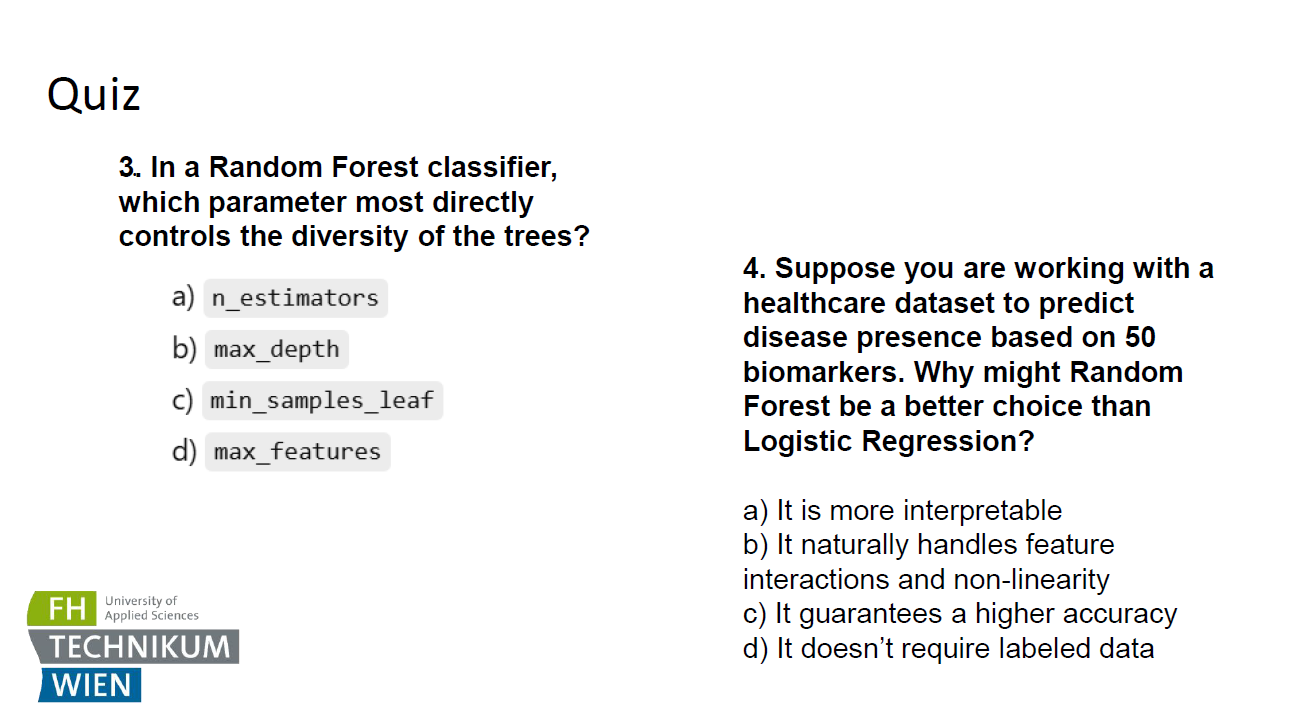


---

**Slide 19: Quiz (continued)**

*Spoken presentation:*

Let’s go through two more questions to reinforce what we’ve covered.

---

**Question 3:**
**In a Random Forest classifier, which parameter most directly controls the diversity of the trees?**
a) `n_estimators`
b) `max_depth`
c) `min_samples_leaf`
✅ **d) `max_features`**

➡️ The correct answer is **(d)**.
The `max_features` parameter determines **how many features are considered at each split** in a tree.
This is the **core mechanism** for introducing **diversity** in Random Forests. Lower values lead to more diverse trees, which reduces correlation and improves the ensemble’s robustness.

---

**Question 4:**
**Suppose you are working with a healthcare dataset to predict disease presence based on 50 biomarkers. Why might Random Forest be a better choice than Logistic Regression?**
a) It is more interpretable
✅ **b) It naturally handles feature interactions and non-linearity**
c) It guarantees a higher accuracy
d) It doesn’t require labeled data

➡️ The correct answer is **(b)**.
Random Forests are **non-parametric models**, which means they don’t assume linear relationships.
They are very good at capturing **non-linear patterns** and **interactions between features**, which is common in medical and biological data.

Logistic regression, on the other hand, is **linear by default**, unless manually extended with feature engineering.

---


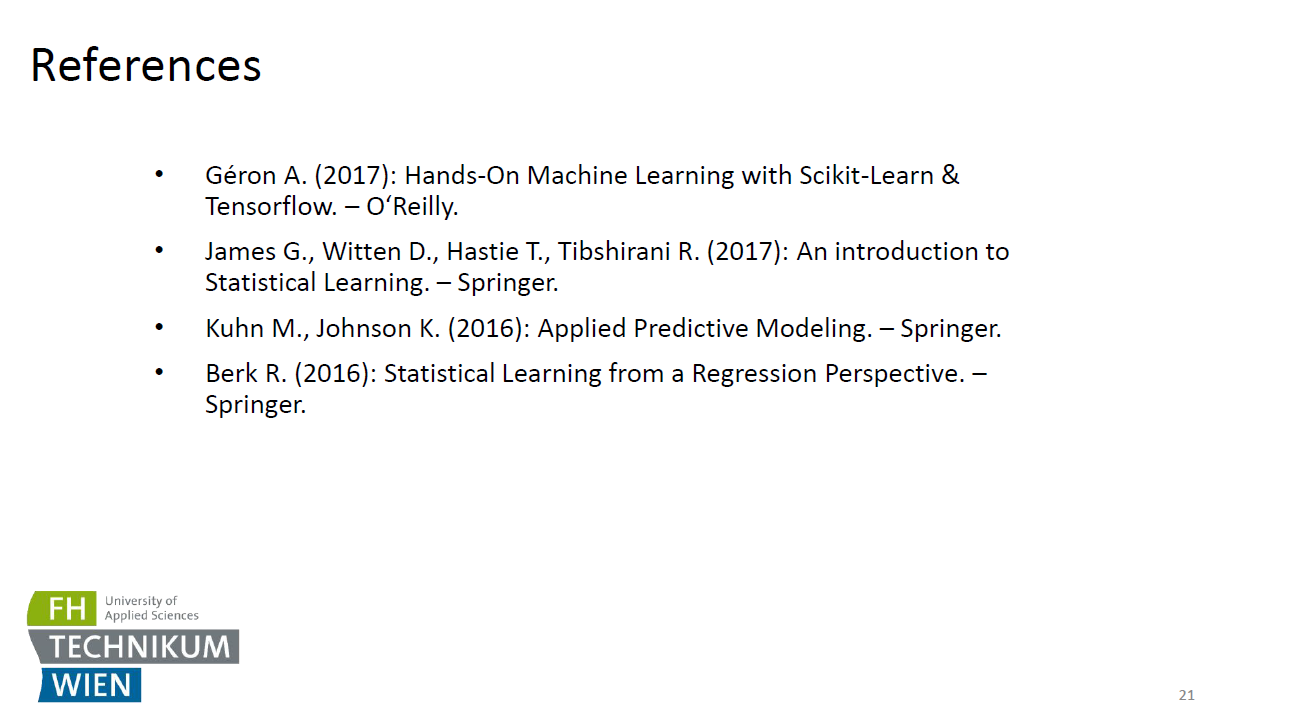